# Module 3 
Replication of the eviews code for python

### Seassion 3 Questions

In [139]:
import pandas as pd
import numpy as np
#import data
df = pd.read_csv("Module3_data/module3_data_Identifying_ARMA.csv")
df.head()

,et
0,-1.213866
1,-0.285460
2,0.590270
3,0.828546
4,-0.995426


#### Question 3.8

The variable et represents a random shock variable. Provide the average and standard-deviation of et below ?

In [140]:
# Descriptive statistics
df.describe()

,et
count,500.000000
mean,-0.028460
std,0.982000
min,-3.106688
25%,-0.722506
50%,-0.025935
75%,0.620061
max,2.988090


**MEAN** -0.028
**Standard deviation**  0.982

**Question 3.9**

yt = 3.0 + 0.55yt-1 + et

Enter the value of the 5th observation of variable yar

In [141]:
yar = []
et = np.array(df['et'])
yar.append(0) #append the first observation

In [142]:
for i in range(1,len(et)):
    yar.append(3 + 0.55*yar[i-1] + et[i])
#print the 5th observation
print("Answer",round(yma[4],3))

Answer -2.915


**Question 3.10**

Enter the value of the 5th observation of variable yma

In [143]:
yma = []
yma.append(0)

for i in range(1,len(et)):
    yma.append(-2.5 + et[i] + 0.7 * et[i-1])
    
print("Answer",round(yma[4],3))

Answer -2.915


**Question 3.12**

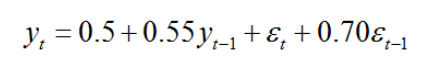

Enter the value of the 5th observation of yarma

In [144]:
yarma = []
yarma.append(0)

for t in range(1,len(et)):
    yarma.append(0.5 + 0.55 * yarma[t-1] + et[t] + 0.7 * et[t-1])

print("Answer",round(yarma[4],3))

Answer 1.206


**Question 3.13**

compute the ACF at lags 1-20 for the four series: et and Variables yar,yma and yarma.
Enter the values (using 3 decimal places, without rounding) of the ACF at one lag for each series below

In [145]:
import statsmodels.api as sm
acf_et = sm.tsa.stattools.acf(et, nlags = 20, adjusted = True)
acf_yar = sm.tsa.stattools.acf(yar, nlags = 20, adjusted = True)
acf_yma = sm.tsa.stattools.acf(yma, nlags = 20, adjusted = True)
acf_yarma = sm.tsa.stattools.acf(yarma, nlags = 20, adjusted = True)

C:\Users\JGSILVA\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [146]:
# values at one lag
print("et", round(acf_et[1],3))
print("ar", round(acf_yar[1],3))
print("ma", round(acf_yma[1],3))      
print("arma", round(acf_yarma[1],3))

et 0.024
ar 0.522
ma 0.427
arma 0.728


**Question 3.14**

In [147]:
0.55**2

0.30250000000000005

**Question 3.15**

In [148]:
# values at one lag
print("et", round(acf_et[2],3))
print("ar", round(acf_yar[2],3))
print("ma", round(acf_yma[2],3))      
print("arma", round(acf_yarma[2],3))

et -0.099
ar 0.207
ma -0.102
arma 0.332


**Question 3.17**

 estimate the PAC for variable yar for lag 1, then for lag 2

In [149]:
# from sklearn.linear_model import LinearRegression
# ols =  LinearRegression()
y_ar_lag = [np.nan]
for t in range(1, len(yar)):
    y_ar_lag.append(yar[t-1])

In [150]:
df['yar_lag'] = np.array(y_ar_lag)
df['yar'] = np.array(yar)
df = sm.tools.add_constant(df)
df.head()

C:\Users\JGSILVA\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,et,yar_lag,yar
0,1.0,-1.213866,NaN,0.000000
1,1.0,-0.285460,0.000000,2.714540
2,1.0,0.590270,2.714540,5.083267
3,1.0,0.828546,5.083267,6.624343
4,1.0,-0.995426,6.624343,5.647963


In [154]:
X = df[['yar_lag', 'const']]
model = sm.OLS(df['yar'], X , missing='drop')
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    yar   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     204.3
Date:                Tue, 07 Sep 2021   Prob (F-statistic):           4.62e-39
Time:                        16:43:46   Log-Likelihood:                -698.03
No. Observations:                 499   AIC:                             1400.
Df Residuals:                     497   BIC:                             1408.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
yar_lag        0.5252      0.037     14.292      0.0